In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
%matplotlib inline

# scikit-learn Iris data

In [2]:
iris = datasets.load_iris()

In [3]:
#Loading 

X_visualize = pd.DataFrame(iris.data, columns =["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
y_visualize = pd.DataFrame(iris.target, columns = ["Target"])

#Displaying Target(needed)

y_visualize.head()

,Target
0,0
1,0
2,0
3,0
4,0


### 1. Visualizing the Iris dataset:



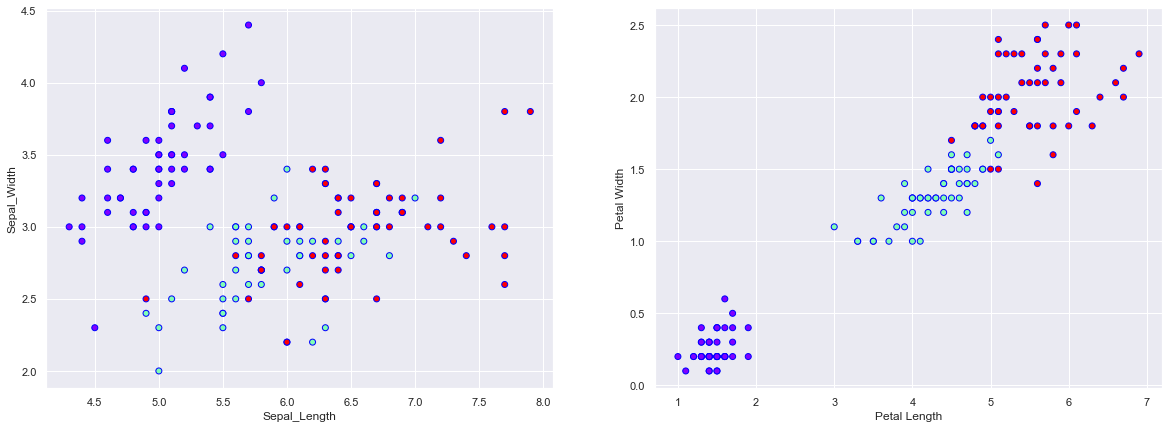

In [4]:
#Col names

X_Sepal = X_visualize[['Sepal Length','Sepal Width']]
X_Petal = X_visualize[['Petal Length','Petal Width']]


##1)Visualizing the relationship between Sepal and target classes.
##2)Visualizing the relationship between Petal and target classes.


##Plotting fig size

plt.figure(figsize = (20, 7))

#Plotting for figure Sepal w.r.t Target class
#SL--SW

plt.subplot(1,2,1)
plt.scatter(X_Sepal['Sepal Length'], X_Sepal['Sepal Width'], c = y_visualize.to_numpy(), 
            cmap = 'rainbow', edgecolors = 'blue')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')

#Plotting for figure Petal w.r.t Target class
#PL--PW
#ref

plt.subplot(1,2,2)
plt.scatter(X_Petal['Petal Length'], X_Petal['Petal Width'], c = y_visualize.to_numpy(), 
            cmap = 'rainbow', edgecolors = 'blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#Initializing the variables

X = iris.data
y = iris.target
X = X[:,0:2]

#plt.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow', edgecolors = 'blue')
#plt.xlabel('Sepal Length')
#plt.ylabel('Sepal Width')

#Now Loading data--Train--Test--Split feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)

### 2.) For Iris Sepal features, modeling SVM classifier with kernels of linear, RBF, and polynomial with degree=3.

In [5]:
#Importing SVC

from sklearn.svm import SVC

##The decision function can be either "ovo" or "ovr"

## 1st decision_function_shape is set to 'ovr'

linear_k = SVC(kernel='linear', decision_function_shape ='ovr')
linear_k.fit(X_train, y_train)

## 2nd decision_function_shape is set to 'ovr'

rbf_k = SVC(kernel='rbf', decision_function_shape ='ovr')
rbf_k.fit(X_train, y_train)

## 3rd decision_function_shape is set to 'ovo'

polynomial_k = SVC(kernel='poly', degree = 3, decision_function_shape ='ovo')
polynomial_k.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='poly')


### 3.) Visualizing the above SVM classifiers with Iris Sepal features.

In [6]:
def def_visual_svm(model, x, y, title):

#MIN MAX
    x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
    xv, yv = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    V = model.predict(np.vstack([xv.ravel(), yv.ravel()]).T)
    V = V.reshape(xv.shape)
    plt.contourf(xv, yv, V, cmap = 'rainbow', alpha = 0.4)
    plt.scatter(x[:,0], x[:,1], c = y, cmap = 'prism', edgecolors = 'black')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(title)

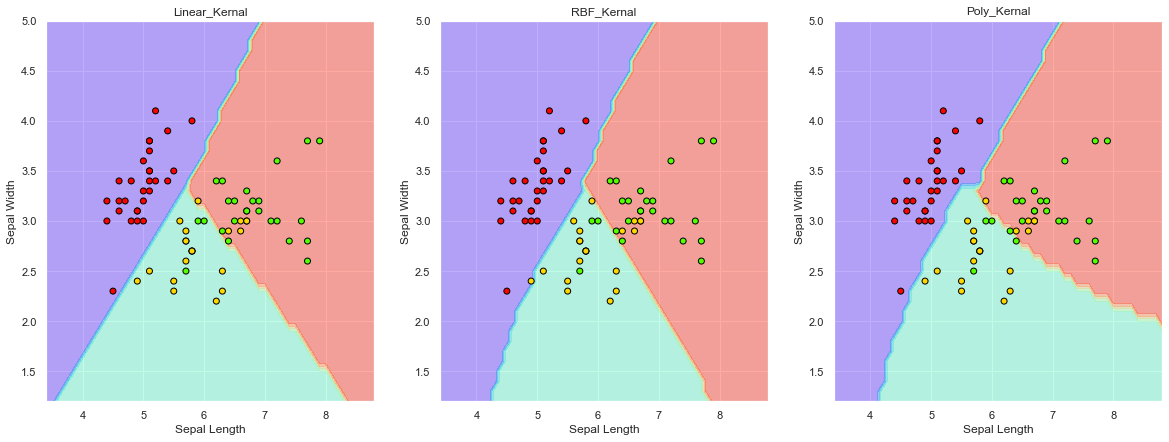

In [7]:
#Fig size

plt.figure(figsize = (20, 7))

#Plotting the sub-plots for Linear--RBF--Kernal

plt.subplot(1,3,1)
def_visual_svm(linear_k, X_train, y_train, 'Linear_Kernal');

plt.subplot(1,3,2)
def_visual_svm(rbf_k, X_train, y_train, 'RBF_Kernal');

plt.subplot(1,3,3)
def_visual_svm(polynomial_k, X_train, y_train, 'Poly_Kernal');


# 4). Calculating the accuracy scores of predicting Iris Sepal features with above SVM classifiers.

In [8]:
#Predict Linear--RBF--Poly

predict_linearmodel = linear_k.predict(X_test)
predict_rbfmodel = rbf_k.predict(X_test)
predict_polynomialmodel = polynomial_k.predict(X_test)

#Importing acc
from sklearn.metrics import accuracy_score

linear_accuracy = accuracy_score(y_test, predict_linearmodel)
rbf_accuracy = accuracy_score(y_test, predict_rbfmodel)
polynomial_accuracy = accuracy_score(y_test, predict_polynomialmodel)

In [9]:
print("Accuracy_Scores:")
print("\n_________________________________________________________________________")

print("Linear_Kernal:    ", linear_accuracy)
print("\n*************************************************************************")
print("RBF_Kernal:       ", rbf_accuracy)
print("\n*************************************************************************")
print("Poly_Kernal:      ", polynomial_accuracy)
print("\n*************************************************************************")

Accuracy_Scores:

_________________________________________________________________________
Linear_Kernal:     0.72

*************************************************************************
RBF_Kernal:        0.72

*************************************************************************
Poly_Kernal:       0.7066666666666667

*************************************************************************


# 5). Model Selection 1:

5. Model Selection 1:

Using 10-fold cross validation (CV) to tune the number of neighbors or KNN (import KNeighborsClassifier); and find the best accuracy.

In [10]:
#Taking all the above features 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Now plotting range--> for i= 1,70

KNN_scr = []
for i in range(1,70):
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    scores_xalc = cross_val_score(model_KNN, iris.data , iris.target, cv = 10)
    KNN_scr.append(scores_xalc.mean())

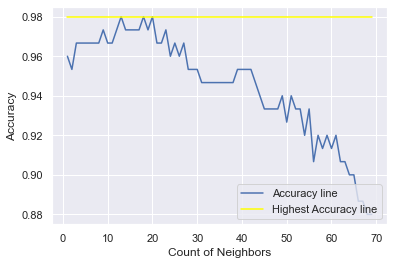

In [11]:
#Plotting--Visualizing the graph

plt.plot(range(1,70), KNN_scr, label = 'Accuracy line')
plt.plot(range(1,70), np.ones(69)*max(KNN_scr), color = 'yellow', label = 'Highest Accuracy line')
plt.xlabel('Count of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

In [13]:
#Printing Maximum Accuracy

print("Maximum accuracy: %.2F with 43 to 47 neighbors" %(max(KNN_scr)))

Maximum accuracy: 0.98 with 43 to 47 neighbors


### 6. Model Selection 2:
Using 10-fold cross validation (CV) to find the mean of the accuracies from Gaussian Naïve Bayes.

In [14]:
#Importing GaussNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Gauss_scr = cross_val_score(gnb, iris.data, iris.target, cv = 10)

The mean best accuracy using 10 fold Cross_Validation_GaussNB is 0.95


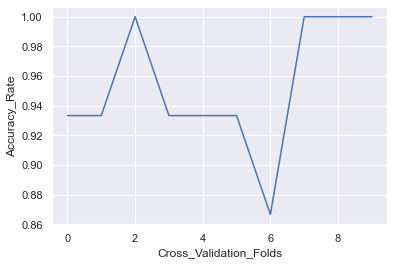

In [15]:
#Plotting X & Y Label

plt.plot(range(len(Gauss_scr)), Gauss_scr)
plt.xlabel('Cross_Validation_Folds')
plt.ylabel('Accuracy_Rate')

print("The mean best accuracy using 10 fold Cross_Validation_GaussNB is %.2F" %(Gauss_scr.mean()))

The mean best accuracy using 10 fold KNN_3n is 0.9666666666666666


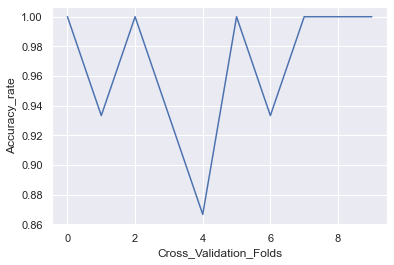

In [49]:
#Now Taking Neighbors= 3

KNN_3n = KNeighborsClassifier(n_neighbors = 3)
scr_3n = cross_val_score(KNN_3n, iris.data , iris.target, cv = 10)
plt.plot(range(len(scr_3n)), scr_3n)
plt.xlabel('Cross_Validation_Folds')
plt.ylabel('Accuracy_rate')

#Printing acc

print("The mean best accuracy using 10 fold KNN_3n is",(scr_3n.mean()))

### 7. Visualizing and analyzing the above models to conclude the optimal one and explain the reason.

Max accuracy of 0.9800000000000001


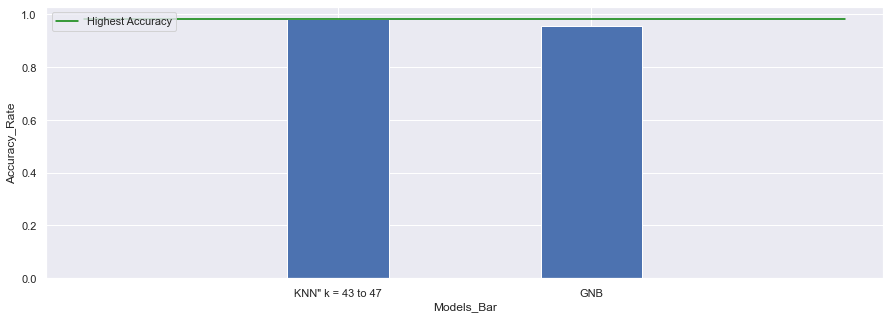

In [45]:
#Visualizing the best

tot = { 'KNN" k = 43 to 47': max(KNN_scr), 'GNB': Gauss_scr.mean()}
mods = tot.keys()
acc = tot.values()
plt.figure(figsize = (15, 5))
plt.bar(mods, acc, 0.4)
plt.plot(range(-1,3), np.ones(4)*max(acc), color = 'green', label = 'Highest Accuracy')
plt.xlabel('Models_Bar')
plt.ylabel('Accuracy_Rate')
plt.legend(loc = 'upper left')


#Printing best accuracy

print("Max accuracy of",(max(acc)))

### Explanation 
From the above bar graph we can infer that the best model to work with is the one modeled with K-nearest Neighbor as it gives
Accuracy is more than GaussianNB Model



# Dataset 2:  Advertising.csv

In [18]:
#Adv Dataset load--Read

dataframe = pd.read_csv('Advertising.csv')
print(dataframe)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


### 1. Using 10-fold cross-validation with the features of media with and without “Newspaper”.

In [33]:
#10fold with and without Cross-Validation

df=dataframe.drop(['Sales'], 
                  axis=1)

X=df.iloc[:,1:].values
y=dataframe['Sales']

In [34]:
#10 fold cross validation with Newspapers as features

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
mod1 = LinearRegression()
linear_cross_val_score=cross_val_score(mod1,X,y,cv=10,scoring='neg_mean_squared_error')
linear_cross_val_score



array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [35]:
#10 fold cross validation without newspaper as feature

X_without=df.iloc[:,1:3].values
y_without=dataframe['Sales']
linear_cross_val_score_without_newspaper=cross_val_score(mod1,X_without,y_without,cv=10,scoring='neg_mean_squared_error')
print(linear_cross_val_score_without_newspaper)



[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]


In [36]:
#MSE with and without newspaper

mse_newspaper=-linear_cross_val_score
print("mse with newspaper as a feature is ",mse_newspaper.mean())



mse with newspaper as a feature is  3.059967618118514


In [37]:
#MSE  without newspaper

mse_newspaper=-linear_cross_val_score_without_newspaper
print("mse without newspaper as a feature is ",mse_newspaper.mean())


mse without newspaper as a feature is  3.0139191555404694


# Explanation:

The model without Newspaper feature has the lower mse. This concludes that Newspaper as a feature should not be included in the linear regression model on the given data.